# Machine Learning Project: Employee Turnover Analytics
Chandni Kazi 
03/30/24

In [22]:
import numpy as np 
import pandas as pd
import openpyxl
import os 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [23]:
#Read in the dataset
df = pd.read_excel("1688640705_hr_comma_sep.xlsx")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [24]:
#Rename "sales" to "Department"
df.rename(columns={'sales':'Department',
                   'average_montly_hours':'average_monthly_hours'},inplace=True)
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

Perform data quality checks

In [25]:
#Shape of data frame
print(f'the data frame has {df.shape[1]} features and {df.shape[0]} rows')

the data frame has 10 features and 14999 rows


In [26]:
#variable information 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


### 1. Perform data quality check by checking for missing values if any. 

In [60]:
#any missing values
df.isna().sum()
print(f'There are {df.isna().sum().sum()} missing values across the entire dataset.')


There are 0 missing values across the entire dataset.


Text(0.5, 1.0, 'Missing values heatmap')

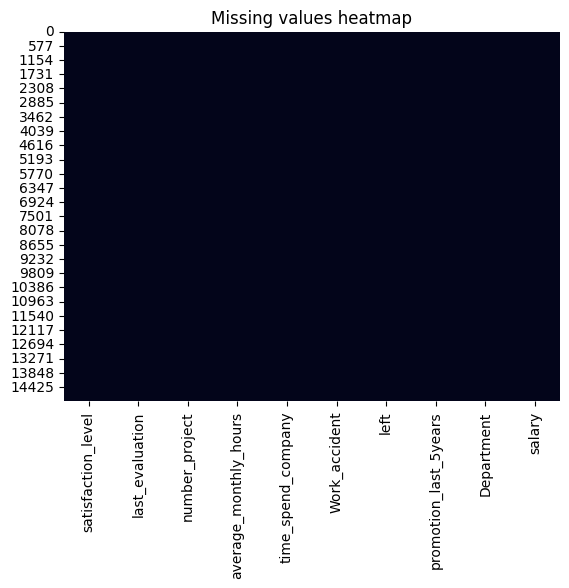

In [62]:
sns.heatmap(df.isna(),cbar=False).set_title("Missing values heatmap")
#There are no missing values

In [28]:
#summary of numerical data
df.describe()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [29]:
#Summary of categorial data 
def colvals(dataframe):
    """
    loop through the columns fo a dataframe and output the value counts for each column.
    Args: the input dataframe
    Returns: A dictionary where keys are column names and values are the value counts
    """
    value_counts_dict = {}
    for col in dataframe.columns:
        if dataframe[col].dtype =='object':
            value_counts_dict[col]=dataframe[col].value_counts()

    return value_counts_dict

value_results = colvals(df)

for col, value_counts in value_results.items(): 
    print(f"Value counts for column '{col}':\n{value_counts}\n ")

Value counts for column 'Department':
Department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64
 
Value counts for column 'salary':
salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64
 


### 2.1 Draw a heatmap of the correlation matrix between all numerical features/columns in the data

Chandni's Observations: 
- There is a strong correlation between 'last evaluation' and 'number of projects'as well as with 'average monthly hours.'
- There is a moderately strong correlation between 'number of projects' and 'average monthly hours'
- All other correlations are weak correlations 

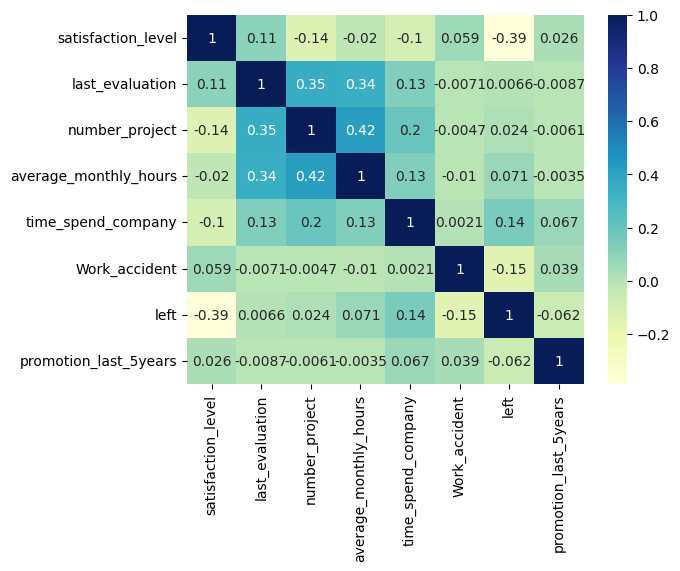

In [30]:
#print(df.corr(numeric_only=True))
heatmapplot = sns.heatmap(df.corr(numeric_only=True),cmap="YlGnBu",annot=True)

### 2.2 Draw the distribution plot of 
- Employee satisfaction (satisfaction_level)
- Employee evaluation (last_evaluation)
- Employee average monthly hours (average_monthly_hours)

Chandni's Observations: 
- Although 'employee satisfaction' mean and mode are equivalent, the distribution has a non-normal pattern (two peaks). Many employees have a very low employee satisfaction and then the rest of graph presents somewhere between uniform and normal distribution. 
- Although 'employee evaluation' mean and mode and equivalent, the distribution has a non-normal pattern. 
- - Although 'employee average monthly hours' mean and mode and equivalent, the distribution has a non-normal pattern (two peaks). 

[Text(0.5, 1.0, 'Employee Average Monthly Hours')]

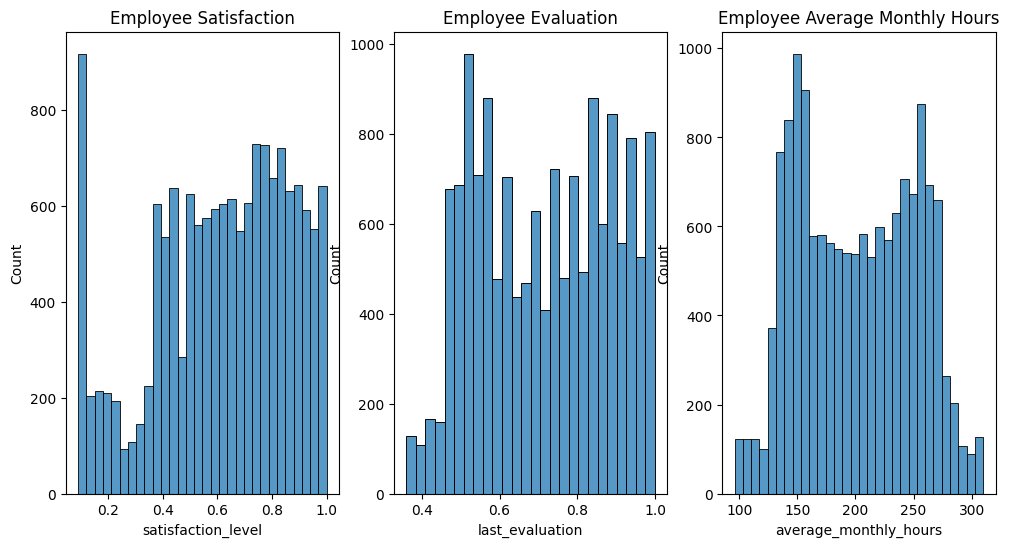

In [31]:
fig,axs = plt.subplots(ncols=3,figsize=(12,6))
sns.histplot(df,x='satisfaction_level',ax=axs[0]).set(title='Employee Satisfaction')
sns.histplot(df,x='last_evaluation',ax=axs[1]).set(title='Employee Evaluation')
sns.histplot(df,x='average_monthly_hours',ax=axs[2]).set(title="Employee Average Monthly Hours")


### 2.3 Draw the bar plot of Employee Project Count of both employees who left and who stayed in the organization (use column number_project and hue column left) and give your inferences from the plot

Chandni's Observation: 
The bar graph below shows that the average number of projects is slightly higher among employees that left the company than employees that stayed. This visual difference is likely not statistically significant. 

<Axes: ylabel='number_project'>

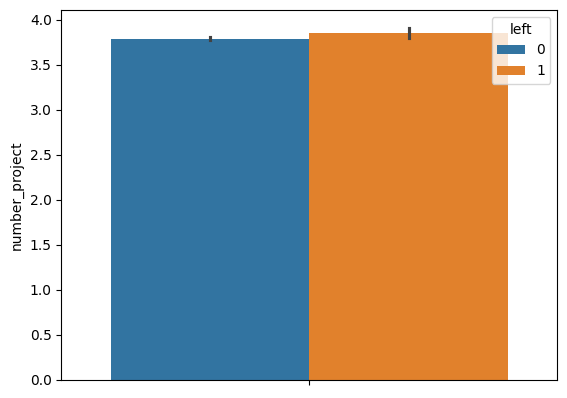

In [32]:
sns.barplot(df,y='number_project',hue='left')

### 3. Perform clustering of employees who left based on their satisfaction and evalution. 
3.1 Choose columns satisfaction_level, last_evaluation and left.
3.2 Do KMeans clustering of employees who left the company into 3 clusters. 
3.3 Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters

Chandni's Observations: 
- The following look like 3 clusters of employees that left the company: 
    1. Employees with extremely low satisfaction levels but very good performance evaluations 
    2. Employees with low-to-moderate satisfaction levels but low performers overall 
    3. Employees with extremely high satisfaction levels and great evaluation scores. 
  

In [45]:
#only employees that left the company: 3,571 employees left the company
df_left = df[df['left']==1].iloc[0:3571,0:7]
df_left.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left
0,0.38,0.53,2,157,3,0,1
1,0.80,0.86,5,262,6,0,1
2,0.11,0.88,7,272,4,0,1
3,0.72,0.87,5,223,5,0,1
4,0.37,0.52,2,159,3,0,1


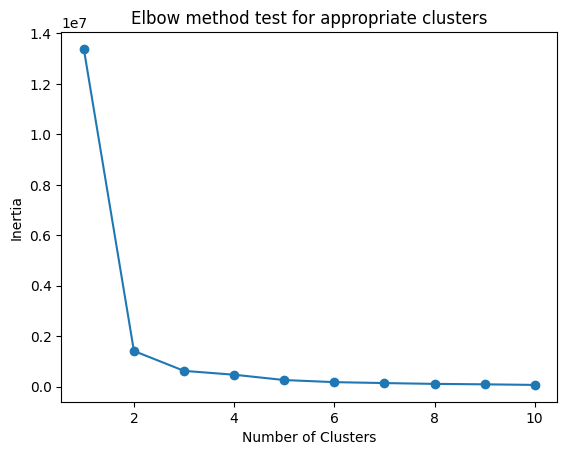

In [46]:
#Check number of appropriate clusters 
iner- Overall 





tias = []

for i in range(1,11): 
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_left)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11),inertias,marker='o')
plt.title("Elbow method test for appropriate clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()



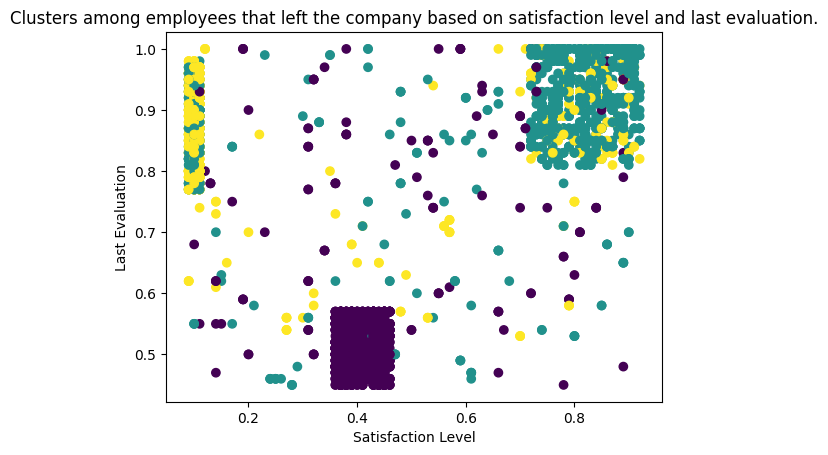

In [57]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_left)
plt.scatter(df_left['satisfaction_level'],df_left['last_evaluation'],c=kmeans.labels_)
plt.title("Clusters among employees that left the company based on satisfaction level and last evaluation.")
plt.xlabel("Satisfaction Level")
plt.ylabel("Last Evaluation")
plt.show()